In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def rescale_matrix(distances, size):
    
    n = len(distances)
    
    if size > n:
        size = n
        
    blocks = [(int(i*n/size), int((i+1)*n/size))  for i in range(size)]
    
    return  [[  
        sum(sum(row[x0:x1]) for row in distances[y0:y1] )/(x1-x0)/(y1-y0)    
        for x0, x1 in blocks] 
        for y0, y1 in blocks
    ]
    
    
def reorder_matrix(distances, order):
    r = list(zip(*[distances[i] for i in order]))
    return list(zip(*[r[i] for i in order]))


def draw_heatplot(distances, size, order=None, **args):
    if order:
        distances = reorder_matrix(distances, order)
    distances = rescale_matrix(distances, size)
    sns.heatmap(distances, square=True, **args)
    plt.show()
    

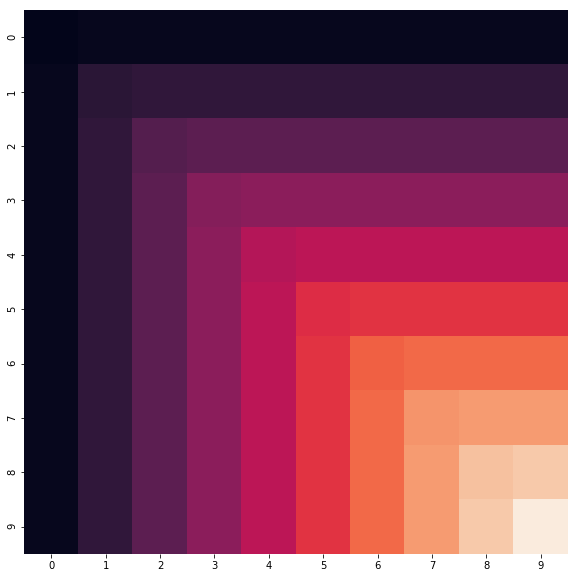

In [4]:
xs = [[min(x,y) for y in range(100)] for x in range(100)]
plt.figure(figsize=(10, 10))
import random
r = [*range(40)]
#random.shuffle(r)
draw_heatplot(xs, 10, r, cbar=False)

In [64]:
def min_distance_with_offset(m1, m2, offset=6, pixel_distance=lambda x,y: abs(x-y)):
    
    d = -1
    
    for I in range(offset+1):
        for J in range(offset+1):
            
            diff = [
                pixel_distance(
                    m1[i][j], 
                    m2[i+I][j+J] if i+I < len(m2) and j+J < len(m2[0]) else 255
                )
                for i in range(len(m1)-I)
                for j in range(len(m1[0])-J)
                if  m1[i][j] != 255 or m2[i+I][j+J] != 255
            ]
            
            s = sum(diff)/len(diff)
            
            if d == -1 or s < d:
                d = s
                
    return d

In [58]:
a = [[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 225, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 242, 160, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 190, 197, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 141, 255, 255, 255, 255, 214, 125, 133, 222, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 162, 255, 255, 255, 255, 181, 144, 218, 165, 179, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 168, 255, 255, 255, 255, 146, 148, 255, 255, 232, 130, 222, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 173, 255, 255, 255, 255, 145, 196, 255, 255, 255, 144, 155, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 188, 203, 255, 255, 255, 255, 113, 255, 255, 255, 255, 255, 222, 141, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 167, 230, 212, 187, 212, 142, 229, 196, 202, 183, 106, 168, 135, 147, 164, 143, 147, 133, 130, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 150, 141, 181, 146, 104, 107, 128, 121, 129, 116, 89, 138, 131, 153, 142, 128, 148, 153, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 171, 133, 255, 246, 155, 217, 255, 255, 240, 175, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 143, 255, 255, 130, 255, 255, 255, 200, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 169, 191, 171, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 174, 183, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 247, 194, 141, 183, 171, 149, 152, 221], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 222, 255, 255, 255, 255, 248, 233, 172, 164, 117, 117, 124, 119, 100, 126, 123, 128, 117, 128, 140], [255, 255, 255, 255, 255, 255, 255, 255, 195, 213, 211, 137, 101, 136, 137, 130, 147, 136, 142, 208, 244, 248, 245, 169, 206, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 203, 219, 218, 166, 142, 185, 255, 255, 255, 255, 255, 255, 255, 255, 255, 173, 225, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 227, 153, 88, 123, 191, 255, 255, 255, 255, 255, 255, 255, 255, 143, 153, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 168, 156, 189, 208, 217, 255, 255, 255, 255, 255, 255, 255, 255, 140, 209, 255, 255, 255, 255, 255, 255, 255, 255, 255], [183, 232, 255, 255, 255, 255, 255, 255, 194, 137, 230, 203, 255, 255, 255, 255, 255, 255, 255, 255, 214, 204, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [208, 222, 255, 255, 255, 255, 255, 255, 163, 222, 255, 255, 255, 255, 255, 255, 154, 190, 175, 199, 149, 233, 247, 229, 170, 107, 135, 168, 255, 255, 255, 255], [255, 180, 255, 255, 255, 255, 255, 173, 183, 208, 159, 207, 255, 255, 255, 255, 150, 154, 137, 126, 112, 117, 120, 133, 120, 120, 156, 255, 255, 255, 255, 255], [255, 148, 235, 255, 255, 255, 168, 199, 255, 255, 194, 255, 255, 255, 255, 255, 255, 255, 255, 144, 244, 255, 255, 207, 164, 227, 255, 255, 255, 255, 255, 255], [255, 232, 123, 154, 162, 147, 179, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 204, 204, 255, 255, 225, 179, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 131, 152, 234, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 222, 140, 255, 255, 176, 152, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 138, 131, 255, 255, 122, 220, 255, 255, 255, 130, 183, 146, 144, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 156, 255, 255, 206, 183, 255, 255, 190, 170, 163, 244, 162, 173, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 174, 146, 150, 134, 186, 255, 255, 255, 142, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 157, 126, 243, 255, 255, 255, 154, 186, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 183, 174, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 197, 189, 255, 255, 255, 255, 255]]
b = [[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 187, 162, 142, 190, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 125, 140, 172, 183, 169, 151, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 226, 162, 232, 255, 255, 255, 255, 255, 202, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 95, 222, 255, 255, 255, 255, 255, 255, 217, 144, 255, 255, 255, 255, 255, 255, 255, 235, 173, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 112, 116, 210, 255, 255, 255, 255, 148, 117, 255, 255, 255, 255, 255, 255, 255, 255, 255, 167, 218, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 161, 144, 255, 255, 255, 255, 255, 100, 200, 255, 255, 255, 255, 255, 255, 255, 255, 255, 197, 172, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 168, 178, 255, 255, 255, 255, 140, 183, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 222, 196, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 179, 160, 255, 255, 255, 212, 166, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 202, 185, 255, 255, 255], [255, 166, 160, 101, 142, 123, 162, 128, 151, 163, 116, 199, 192, 154, 116, 224, 240, 248, 255, 255, 255, 255, 255, 255, 255, 255, 206, 167, 181, 255, 255, 255], [255, 155, 198, 91, 110, 193, 120, 124, 201, 133, 113, 148, 143, 89, 126, 132, 113, 112, 164, 138, 131, 134, 142, 115, 129, 138, 151, 222, 255, 255, 255, 255], [255, 149, 145, 255, 255, 255, 255, 255, 255, 255, 113, 190, 116, 255, 255, 255, 255, 255, 255, 255, 244, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 174, 177, 255, 255, 255, 255, 255, 255, 112, 129, 218, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [190, 255, 255, 148, 180, 255, 255, 255, 255, 255, 109, 167, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [180, 255, 255, 255, 169, 153, 255, 255, 255, 185, 113, 231, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 187, 147, 143, 157, 170, 151], [255, 255, 255, 255, 237, 108, 91, 221, 218, 119, 120, 247, 255, 255, 255, 255, 229, 255, 193, 183, 173, 136, 120, 103, 104, 117, 156, 197, 221, 248, 255, 255], [255, 255, 255, 255, 255, 152, 85, 81, 91, 121, 93, 130, 141, 155, 133, 129, 132, 148, 162, 156, 233, 135, 102, 178, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 155, 88, 95, 96, 156, 235, 255, 255, 255, 255, 255, 255, 255, 255, 152, 116, 165, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 240, 108, 150, 141, 144, 196, 255, 255, 255, 255, 255, 255, 255, 255, 113, 138, 255, 255, 255, 255, 255, 194, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 120, 238, 255, 255, 255, 183, 196, 255, 255, 255, 255, 255, 255, 255, 113, 255, 255, 255, 255, 255, 255, 189, 174, 255, 255, 255], [255, 255, 255, 255, 255, 255, 111, 255, 255, 255, 255, 255, 172, 255, 255, 255, 255, 255, 255, 121, 191, 255, 255, 255, 255, 255, 182, 235, 198, 212, 255, 255], [255, 255, 255, 255, 255, 183, 99, 255, 255, 255, 255, 255, 207, 211, 255, 255, 255, 255, 122, 83, 255, 255, 255, 255, 255, 255, 162, 255, 255, 145, 255, 255], [255, 255, 255, 255, 255, 132, 124, 255, 255, 255, 255, 255, 143, 137, 108, 213, 226, 235, 107, 143, 255, 255, 255, 255, 180, 84, 102, 213, 156, 136, 255, 255], [255, 255, 255, 255, 255, 177, 132, 255, 255, 255, 255, 255, 213, 136, 124, 115, 110, 95, 99, 125, 141, 133, 126, 117, 88, 107, 208, 194, 181, 202, 255, 255], [255, 255, 255, 255, 255, 158, 163, 255, 255, 255, 255, 255, 231, 147, 126, 155, 237, 109, 248, 255, 255, 255, 212, 180, 255, 255, 255, 255, 196, 179, 255, 255], [255, 255, 255, 255, 255, 203, 134, 255, 255, 255, 255, 206, 160, 255, 225, 106, 132, 119, 232, 255, 255, 255, 255, 191, 255, 255, 217, 182, 194, 209, 255, 255], [255, 255, 255, 255, 255, 255, 99, 140, 217, 181, 175, 167, 255, 255, 255, 255, 109, 107, 158, 255, 255, 255, 255, 105, 117, 123, 172, 227, 178, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 175, 164, 230, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 133, 222, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 140, 196, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 166, 190, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 151, 203, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 164, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 177, 255, 255, 255, 255, 255, 255, 255, 255, 255]]
z = [[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 179, 172, 200, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 199, 138, 143, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 240, 152, 159, 200, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 203, 154, 156, 186, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 195, 154, 165, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 204, 171, 172, 217, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 165, 164, 178, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 160, 148, 135, 121, 212, 255, 255, 255, 255, 150, 181, 204, 219, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 247, 234, 225, 166, 161, 129, 142, 116, 102, 130, 183, 185, 138, 158, 108, 138, 105, 129, 101, 106, 102, 86, 96, 103, 126, 107, 143], [207, 141, 126, 138, 131, 148, 157, 158, 153, 164, 182, 144, 124, 112, 117, 116, 133, 133, 132, 117, 138, 123, 133, 132, 136, 135, 115, 101, 130, 152, 168, 209], [255, 206, 187, 212, 227, 255, 255, 255, 255, 253, 158, 142, 189, 230, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 222, 201, 237, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 150, 162, 235, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 201, 209, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 194, 124, 162, 255, 255, 255, 255, 255, 255, 255, 255, 255, 188, 172, 201, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 222, 168, 156, 210, 255, 255, 255, 255, 255, 255, 255, 203, 147, 216, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 234, 163, 167, 244, 255, 255, 255, 255, 200, 178, 156, 203, 209, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 192, 162, 148, 202, 240, 232, 172, 132, 128, 121, 139, 221, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 160, 153, 132, 139, 152, 183, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 244, 244, 245, 246, 255, 247, 227, 233, 219, 233, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 172, 133, 121, 133, 131, 112, 113, 98, 117, 115, 91, 94, 137, 178, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 240, 255, 250, 192, 240, 181, 239, 187, 239, 165, 132, 170, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 225, 141, 162, 213, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 203, 141, 161, 200, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 248, 162, 187, 172, 178, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 225, 136, 159, 193, 255, 255, 255, 255, 255, 255, 216, 194, 183, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 168, 165, 177, 240, 255, 255, 214, 193, 255, 218, 203, 121, 143, 194, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 210, 170, 202, 229, 255, 255, 197, 154, 217, 220, 163, 159, 174, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 164, 156, 202, 198, 170, 159, 163, 167, 187, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 160, 151, 168, 197, 224, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]

print(min_distance_with_offset(a,b), min_distance_with_offset(a,b,0))
print(min_distance_with_offset(a,z), min_distance_with_offset(a,z,0))

77.79123711340206 77.8340909090909
70.36029411764706 72.44852941176471


In [63]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This function tries to infer a good colormap to use from the data, but
    this is not guaranteed to work, so take care to make sure the kind of
    colormap (sequential or diverging) and its limits are appropriate.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into a